# IMPORT LIBRARIES

## Usage
## This notebook serves as a starting point for the analysis which will be completed for each of the methods. It is important that the same data and dataformat feed into the analysis for consistency purposes

- Import libraries
- Update filepath directory
- Activate import variables + functions
- Import raw data
- Convert data to a a 3072 dimension vector for each image

## Import libraries

In [1]:
import numpy as np
import pickle
import os
#import download
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from pylab import scatter,text,show,cm,figure
from pylab import subplot,imshow,NullLocator
from sklearn import manifold, datasets
import winsound
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
# import plotly.plotly as py
# import plotly.graph_objs as go
%matplotlib inline
import numpy as np
from sklearn.utils import check_random_state
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import datetime
from optparse import OptionParser
from sklearn.decomposition import PCA
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import Isomap
from pydiffmap import diffusion_map as dm
from sklearn import svm

## Update filepath directory

In [2]:

########################################################################
#Filepath for the CIFAR data
# Set this before you start calling any of the functions below.
data_path = "C:\\Users\\ecwit\\Data\\cifar-10" 

## Activate import variables and functions

In [4]:
########################################################################
# Various constants for the size of the images.
# Use these constants in your own program.

# Width and height of each image.
img_size = 32

# Number of channels in each image, 3 channels: Red, Green, Blue.
num_channels = 3

# Length of an image when flattened to a 1-dim array.
img_size_flat = img_size * img_size * num_channels

# Number of classes.
num_classes = 10

########################################################################
# Various constants used to allocate arrays of the correct size.

# Number of files for the training-set.
_num_files_train = 5

# Number of images for each batch-file in the training-set.
_images_per_file = 10000

# Total number of images in the training-set.
# This is used to pre-allocate arrays for efficiency.
_num_images_train = _num_files_train * _images_per_file

########################################################################
# Private functions for downloading, unpacking and loading data-files.


def _get_file_path(filename=""):
    """
    Return the full path of a data-file for the data-set.
    If filename=="" then return the directory of the files.
    """

    return os.path.join(data_path,  filename)


def _unpickle(filename):
    """
    Unpickle the given file and return the data.
    Note that the appropriate dir-name is prepended the filename.
    """

    # Create full path for the file.
    file_path = _get_file_path(filename)

    print("Loading data: " + file_path)

    with open(file_path, mode='rb') as file:
        # In Python 3.X it is important to set the encoding,
        # otherwise an exception is raised here.
        data = pickle.load(file, encoding='bytes')

    return data


def _convert_images(raw):
    """
    Convert images from the CIFAR-10 format and
    return a 4-dim array with shape: [image_number, height, width, channel]
    where the pixels are floats between 0.0 and 1.0.
    """

    # Convert the raw images from the data-files to floating-points.
    raw_float = np.array(raw, dtype=float) / 255.0

    # Reshape the array to 4-dimensions.
    images = raw_float.reshape([-1, num_channels, img_size, img_size])

    # Reorder the indices of the array.
    images = images.transpose([0, 2, 3, 1])

    return images


def _load_data(filename):
    """
    Load a pickled data-file from the CIFAR-10 data-set
    and return the converted images (see above) and the class-number
    for each image.
    """

    # Load the pickled data-file.
    data = _unpickle(filename)

    # Get the raw images.
    raw_images = data[b'data']

    # Get the class-numbers for each image. Convert to numpy-array.
    cls = np.array(data[b'labels'])

    # Convert the images.
    images = _convert_images(raw_images)

    return images, cls


########################################################################
# Public functions that you may call to download the data-set from
# the internet and load the data into memory.


def load_class_names():
    """
    Load the names for the classes in the CIFAR-10 data-set.
    Returns a list with the names. Example: names[3] is the name
    associated with class-number 3.
    """

    # Load the class-names from the pickled file.
    raw = _unpickle(filename="batches.meta")[b'label_names']

    # Convert from binary strings.
    names = [x.decode('utf-8') for x in raw]

    return names


def load_training_data():
    """
    Load all the training-data for the CIFAR-10 data-set.
    The data-set is split into 5 data-files which are merged here.
    Returns the images, class-numbers and one-hot encoded class-labels.
    """

    # Pre-allocate the arrays for the images and class-numbers for efficiency.
    images = np.zeros(shape=[_num_images_train, img_size, img_size, num_channels], dtype=float)
    cls = np.zeros(shape=[_num_images_train], dtype=int)

    # Begin-index for the current batch.
    begin = 0

    # For each data-file.
    for i in range(_num_files_train):
        # Load the images and class-numbers from the data-file.
        images_batch, cls_batch = _load_data(filename="data_batch_" + str(i + 1))

        # Number of images in this batch.
        num_images = len(images_batch)

        # End-index for the current batch.
        end = begin + num_images

        # Store the images into the array.
        images[begin:end, :] = images_batch

        # Store the class-numbers into the array.
        cls[begin:end] = cls_batch

        # The begin-index for the next batch is the current end-index.
        begin = end

    return images, cls


def load_test_data():
    """
    Load all the test-data for the CIFAR-10 data-set.
    Returns the images, class-numbers and one-hot encoded class-labels.
    """

    images, cls = _load_data(filename="test_batch")

    return images, cls

def run_pca(components, data):
    """
    run PCA on the given data
    """
    
    pca = PCA(n_components = components)
    pca.fit(data)
    
    return pca.transform(data)

# CLASSES
# 0 : airplane
# 1 : automobile
# 2 : bird
# 3 : cat
# 4 : deer
# 5 : dog
# 6 : frog
# 7 : horse
# 8 : ship
# 9 : truck

## Import raw data

In [5]:
########################################################################
#Import image data using import functions     
raw_images, cls=load_training_data()


#Print variable to confirm import correctly
# print(raw_images[1:2]) 

# get indices for each class
# each column of index_labels is the set of indices in each class
index_labels = np.zeros((5000, 10), dtype = int)
for i in range(10):
    index_in_new_labels = 0
    index_in_cls = 0
    for x in cls:
        if x == i:
            index_labels[index_in_new_labels, i] = index_in_cls
            index_in_new_labels += 1
        index_in_cls += 1
#     print(total)

# for i in range(10):
#     print(index_labels[:, i])
#######################################################################

Loading data: C:\Users\ecwit\Data\cifar-10\data_batch_1
Loading data: C:\Users\ecwit\Data\cifar-10\data_batch_2
Loading data: C:\Users\ecwit\Data\cifar-10\data_batch_3
Loading data: C:\Users\ecwit\Data\cifar-10\data_batch_4
Loading data: C:\Users\ecwit\Data\cifar-10\data_batch_5


## Create grayscale and Fourier matrices

In [29]:
# print(raw_images.shape)

grayscale = np.zeros([50000,32,32])
for i in range(50000):
    grayscale[i,:,:] = 0.21*raw_images[i,:,:,1] + 0.72*raw_images[i,:,:,1] + 0.07*raw_images[i,:,:,1]

fourier_images = np.zeros([50000,32,32])
for i in range(50000):
    fourier_images[i,:,:] = np.fft.fft2(grayscale[i,:,:])
    fourier_images[i,:,:] = np.fft.fftshift(fourier_images[i,:,:])
    fourier_images[i,:,:] = np.abs(fourier_images[i,:,:])

C:\Users\ecwit\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


## Convert original arrays to correct 3072 dim array per image

In [30]:
raw_images_flat=raw_images.ravel()
grayscale_images_flat = grayscale.ravel()
fourier_images_flat = fourier_images.ravel()

del raw_images
del grayscale
del fourier_images

images_color = raw_images_flat.reshape(-1, img_size_flat)
images_gray = grayscale_images_flat.reshape(-1, 32*32)
images_fourier = fourier_images_flat.reshape(-1, 32*32)

del raw_images_flat
del grayscale_images_flat
del fourier_images_flat

# Run PCA on image vectors

In [55]:
# #RUN PCA on images
take_subset = False
do_PCA = False

if take_subset:
    if do_PCA == True:

        pca_color = PCA(n_components=150)
        pca_gray = PCA(n_components=100)
        pca_fourier = PCA(n_components=100)


        indices = np.array(index_labels[:,[0, 3]].reshape(index_labels[:, [0, 3]].size), dtype = np.intp)

        pca_color.fit(images_color[indices])
        pca_gray.fit(images_gray[indices])
        pca_fourier.fit(images_fourier[indices])

        color_imgreduce = pca_color.transform(images_color[indices])
        gray_imgreduce = pca_gray.transform(images_gray[indices])
        fourier_imgreduce = pca_fourier.transform(images_fourier[indices])
    else:
        color_imgreduce = images_color[indices]
        gray_imgreduce = images_gray[indices]
        fourier_imgreduce = images_fourier[indices]
    
else:
    if do_PCA == True:
        pca_color = PCA(n_components=200)
        pca_gray = PCA(n_components=200)
        pca_fourier = PCA(n_components=150)

        pca_color.fit(images_color)
        pca_gray.fit(images_gray)
        pca_fourier.fit(images_fourier)

        color_imgreduce = pca_color.transform(images_color)
        gray_imgreduce = pca_gray.transform(images_gray)
        fourier_imgreduce = pca_fourier.transform(images_fourier)
    else:
        color_imgreduce = images_color
        gray_imgreduce = images_gray
        fourier_imgreduce = images_fourier
        

In [32]:
# print(color_imgreduce.shape)

In [33]:
#PRINT Explained Variance Ratio
# print('\n Explained Variance')
# print(pca_fourier.explained_variance_ratio_) 
# print('\nSingular Values')
# print(pca_fourier.singular_values_) 
# print('\nCumulative Explained Variance')
# var1=np.cumsum(np.round(pca_fourier.explained_variance_ratio_, decimals=4)*100)
# print(var1)

# plt.plot(var1)

In [34]:
# images_reduced = preprocessing.scale(images_reduced)

## Do Diffusion Map

In [57]:
which_diffusion = 'f'
if which_diffusion == 'c':
    images_reduced = color_imgreduce
elif which_diffusion == 'g':
    images_reduced = gray_imgreduce
elif which_diffusion == 'f':
    images_reduced = fourier_imgreduce

start=datetime.datetime.now()
neighbor_params = {'n_jobs': -1, 'algorithm': 'kd_tree'}
mydmap = dm.DiffusionMap(n_evecs=60, k=100, epsilon=15000, alpha=1.0, neighbor_params=neighbor_params)
X_new = mydmap.fit_transform(images_reduced)
end=datetime.datetime.now()
print(end-start)

0:07:29.463663


## Plot First Three Diffusion Maps Eigenvectors

In [1]:
t = np.zeros(images_reduced[:, 1].size)
for i in range(10):
    lower = 5000*i
    upper = 5000*(i+1)
    t[lower:upper] = 50000*i

fig = plt.figure()
# plt.title("Projected data")
plt.scatter(X_new[:, 0], X_new[:, 1], c = t, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.show()


fig = plt.figure()
ax=Axes3D(fig)
# ax.set_title("Original data")
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c = t, cmap=plt.cm.Spectral)
plt.axis('tight')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

NameError: name 'np' is not defined

## Attempt to cluster

In [59]:
def train_test(data,labels):    
    from sklearn.model_selection import train_test_split 
    df_2 = pd.DataFrame(data)
    X = df_2
    y = labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
    
    return(X_train, X_test, y_train, y_test)

In [ ]:
# if take_subset == False:
#     clusters = 10
# else:
#     clusters = 2
# kmeans = KMeans(n_clusters=clusters, random_state=0).fit(X_new)
# for i in range(clusters):
#     total = 0
#     for x in kmeans.labels_:
#         if x == i: total += 1
#     print(total)


# svm_model = svm.LinearSVC(random_state=0, tol=1e-5)
# svm_model.fit(X_new, t)
# print(svm_model.score(X_new, t))

# kmeans = KMeans(n_clusters=num_classes, random_state=0).fit(mnist_diff)
# for i in range(num_classes):
#     total = 0
#     for x in kmeans.labels_:
#         if x == i: total += 1
#     print(total)

X_train, X_test, y_train, y_test=train_test(X_new, t)

# training a KNN classifier 
knn = KNeighborsClassifier(n_neighbors = 10).fit(X_train, y_train)
  
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print(accuracy) 

# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions)
print(cm)

from sklearn.svm import SVC 
print('\n##########################\n')

svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 
print(cm)
print(accuracy)

0.09768
[[226 199 154 129 118 115  87  83  58  67]
 [237 176 160 149 121 124  86  68  74  75]
 [216 187 165 158 125 118  82  74  70  66]
 [208 202 189 137 117 119  89  67  68  64]
 [209 214 169 136 114 113  74  81  85  69]
 [236 181 164 147  97  92  83  92  63  72]
 [222 211 163 138 119  98  85  79  80  67]
 [202 194 146 134 122 114  89  89  71  70]
 [217 185 152 152 108 115  65  79  69  70]
 [247 185 163 119 142 116  91  77  69  68]]

##########################



## LAPLACIAN EIGENMAPS

In [15]:
# Laplacian Eigenmaps
which_laply = 'g'
if which_laply == 'c':
    images_reduced = color_imgreduce
elif which_laply == 'g':
    images_reduced = gray_imgreduce
elif which_laply == 'f':
    images_reduced = fourier_imgreduce

start=datetime.datetime.now()
model = SpectralEmbedding(n_components=10, n_neighbors=20)
#model = SpectralEmbedding(affinity='rbf', gamma=.1, n_components=3, n_neighbors=10)
laply_new=model.fit_transform(images_reduced)
end=datetime.datetime.now()
print(end-start)

0:01:09.930863


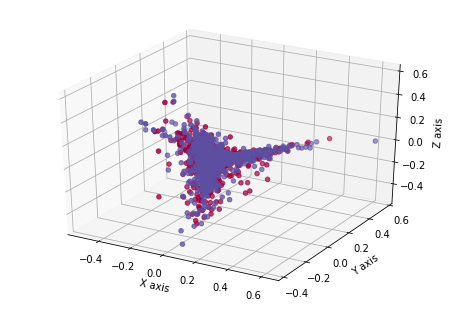

In [16]:
t = np.zeros(images_reduced[:, 1].size)
for i in range(10):
    lower = 5000*i
    upper = 5000*(i+1)
    t[lower:upper] = 50000*i

fig = plt.figure()
ax=Axes3D(fig)
# ax.set_title("Original data")
ax.scatter(laply_new[:, 0], laply_new[:, 1], laply_new[:, 2], c = t, cmap=plt.cm.Spectral)
plt.axis('tight')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

In [17]:
# kmeans = KMeans(n_clusters=num_classes, random_state=0).fit(mnist_diff)
# for i in range(num_classes):
#     total = 0
#     for x in kmeans.labels_:
#         if x == i: total += 1
#     print(total)

X_train, X_test, y_train, y_test=train_test(laply_new, t)

# training a KNN classifier 
knn = KNeighborsClassifier(n_neighbors = 10).fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print(accuracy) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions)
print(cm)

from sklearn.svm import SVC 
print('\n##########################\n')

svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 
print(cm)
print(accuracy)

0.4824
[[775 488]
 [806 431]]

##########################

[[ 156 1107]
 [ 158 1079]]
0.494


## Get MNIST

In [2]:
from pylab import scatter,text,show,cm,figure
from pylab import subplot,imshow,NullLocator
from sklearn import manifold, datasets

# load the digits dataset
# 901 samples, about 180 samples per class 
# the digits represented 0,1,2,3,4
num_classes = 10
digits = datasets.load_digits(n_class=num_classes)
digitsdata = digits.data
print(digits.data)
color = digits.target

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


## DIFFUSION MAP ON MNIST

In [25]:
start=datetime.datetime.now()
neighbor_params = {'n_jobs': -1, 'algorithm': 'kd_tree'}
mydmap = dm.DiffusionMap(n_evecs=20, k=50, epsilon=5000, alpha=0, neighbor_params=neighbor_params)
mnist_diff = mydmap.fit_transform(digitsdata)
end=datetime.datetime.now()
print(end-start)

0:00:00.287484


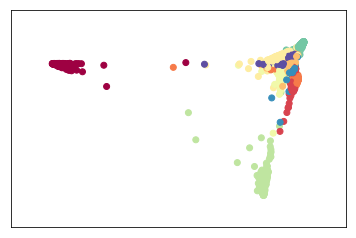

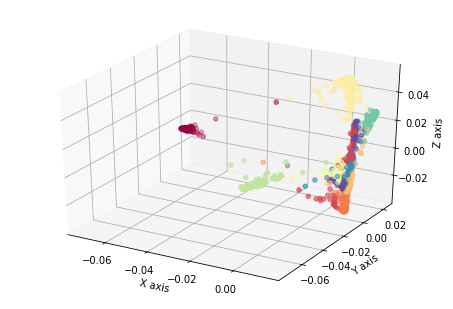

In [26]:
fig = plt.figure()
# plt.title("Projected data")
plt.scatter(mnist_diff[:, 0], mnist_diff[:, 1], c = color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.show()


fig = plt.figure()
ax=Axes3D(fig)
# ax.set_title("Original data")
ax.scatter(mnist_diff[:, 0], mnist_diff[:, 1], mnist_diff[:, 2], c = color, cmap=plt.cm.Spectral)
plt.axis('tight')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

## CLASSIFICATION

In [27]:
def train_test(data,labels):    
    from sklearn.model_selection import train_test_split 
    df_2 = pd.DataFrame(data)
    X = df_2
    y = labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
    
    return(X_train, X_test, y_train, y_test)

In [28]:
# kmeans = KMeans(n_clusters=num_classes, random_state=0).fit(mnist_diff)
# for i in range(num_classes):
#     total = 0
#     for x in kmeans.labels_:
#         if x == i: total += 1
#     print(total)

X_train, X_test, y_train, y_test=train_test(mnist_diff, color)

# training a KNN classifier 
knn = KNeighborsClassifier(n_neighbors = 10).fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print(accuracy) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions)
print(cm)

from sklearn.svm import SVC 
print('\n##########################\n')

svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 
print(cm)
print(accuracy)

0.9755555555555555
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  1  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  4  0  1  0  0  0  0 43  0]
 [ 0  0  0  0  0  1  0  0  0 46]]

##########################

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 1  2 38  1  2  0  0  0  0  0]
 [ 0  0  0 41  4  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  1 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  4  0  0 44  0  0]
 [ 0 13  0  1 27  0  0  0  7  0]
 [ 1  0  0  1 13  1  0  0  0 31]]
0.8377777777777777


## LAPLACIAN EIGENMAP ON MNIST

In [29]:
# Laplacian Eigenmaps

start=datetime.datetime.now()
model = SpectralEmbedding(n_components=20, n_neighbors=30)
#model = SpectralEmbedding(affinity='rbf', gamma=.1, n_components=3, n_neighbors=10)
laply_new=model.fit_transform(digitsdata)
end=datetime.datetime.now()
print(end-start)

0:00:00.969167


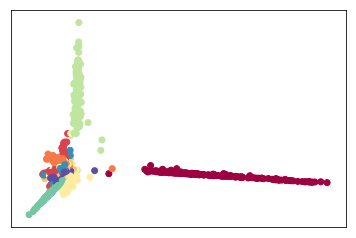

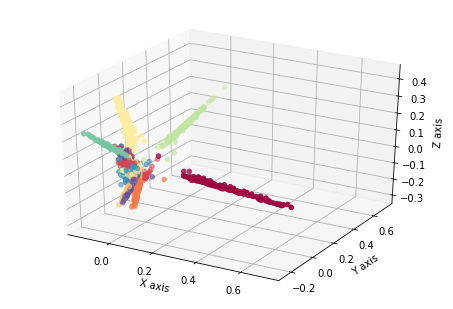

In [30]:
fig = plt.figure()
# plt.title("Projected data")
plt.scatter(laply_new[:, 0], laply_new[:, 1], c = color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.show()


fig = plt.figure()
ax=Axes3D(fig)
# ax.set_title("Original data")
ax.scatter(laply_new[:, 0], laply_new[:, 1], laply_new[:, 2], c = color, cmap=plt.cm.Spectral)
plt.axis('tight')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

In [31]:
# kmeans = KMeans(n_clusters=num_classes, random_state=0).fit(mnist_diff)
# for i in range(num_classes):
#     total = 0
#     for x in kmeans.labels_:
#         if x == i: total += 1
#     print(total)

X_train, X_test, y_train, y_test=train_test(laply_new, color)

# training a KNN classifier 
knn = KNeighborsClassifier(n_neighbors = 10).fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print(accuracy) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions)
print(cm)

from sklearn.svm import SVC 
print('\n##########################\n')

svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 
print(cm)
print(accuracy)

0.98
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  1  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  3  0  2  0  0  0  0 43  0]
 [ 0  0  0  0  0  1  0  0  0 46]]

##########################

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 41  0  0  0  0  1  2  0]
 [ 0  0  1 41  0  0  0  0  2  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  3  0  1  0  0  0  0 44  0]
 [ 0  0  0  0  0  1  0  1  0 45]]
0.9666666666666667
